In [1]:
%cd ../

c:\Users\damor\pececillo\VisionTransformers


In [2]:
import mlflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

import os
#os.environ["PATH"] = "/home/users/dmoreno2016/.TinyTeX/bin/x86_64-linux:" + os.environ["PATH"]

plt.rcParams.update({
    "text.usetex": True,
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [3]:
mlflow.set_tracking_uri("file:./results/macho/ml-runs")

data_name =  'macho'
experiment_name = f"ft_classification/{data_name}/testing"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])
order_columns = [
    'run_id',
    'status',
    'metrics.epoch',
    'metrics.f1/test',
    'metrics.loss/test',
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
    'start_time',
    'end_time',
]

runs = runs[order_columns]
runs_macho = runs.dropna()
runs_macho

Experiment ID for 'ft_classification/macho/testing': 783072213656276512


,run_id,status,metrics.epoch,metrics.f1/test,metrics.loss/test,params.imgs_params/fig_params/linewidth,params.imgs_params/fig_params/markersize,params.imgs_params/input_type,params.imgs_params/use_err,params.training/lr,params.loader/spc,start_time,end_time
0,742f13c120fa49b9a182dac56ff71494,FINISHED,53.0,0.776364,0.946218,2.0,5,overlay,True,5e-06,all,2025-01-23 18:29:54.207000+00:00,2025-01-23 20:13:49.366000+00:00
2,650e5aa202c044e59eea14ee0740c9d4,FINISHED,29.0,0.789615,0.666172,2.0,5,overlay,False,5e-06,all,2025-01-23 17:35:54.712000+00:00,2025-01-23 18:29:12.981000+00:00
4,ce3e35cb2e3a489fbe8b96be18e2d242,FINISHED,45.0,0.766344,0.946607,2.0,5,overlay,True,5e-06,all,2025-01-23 17:14:54.374000+00:00,2025-01-23 18:46:04.654000+00:00
6,310091ea340345b9a41ae44d83ebc89a,FINISHED,19.0,0.809126,0.903938,2.0,5,overlay,True,5e-05,all,2025-01-23 16:47:48.021000+00:00,2025-01-23 17:35:16.376000+00:00
8,94b520a85bc6409eb44ce2438027b7e6,FINISHED,31.0,0.749975,0.839430,2.0,5,overlay,False,5e-06,all,2025-01-23 16:17:57.404000+00:00,2025-01-23 17:14:19.502000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1834e9a16ff84ee0b9f953a7d8567cfb,FINISHED,20.0,0.449913,1.240785,0.5,1,overlay,True,5e-05,20,2025-01-08 05:35:26.966000+00:00,2025-01-08 05:40:04.716000+00:00
1114,2e77008963db49ae908aa395cc4d91e4,FINISHED,30.0,0.522004,1.112165,0.5,1,overlay,False,5e-05,20,2025-01-08 05:28:29.465000+00:00,2025-01-08 05:34:52.165000+00:00
1115,1bf1660e404843a48e0d947c5ddc9ba6,FINISHED,22.0,0.544334,1.066977,0.5,1,overlay,False,5e-05,20,2025-01-08 05:24:19.873000+00:00,2025-01-08 05:28:29.373000+00:00
1116,fe84d0ae103943ccb5482f6a837d08a3,FINISHED,30.0,0.728629,1.236747,0.5,1,overlay,False,5e-05,500,2025-01-08 05:24:08.027000+00:00,2025-01-08 05:38:11.127000+00:00


In [4]:
show_df = runs_macho.copy()
show_df.loc[:, 'training_time'] = show_df['end_time'] - show_df['start_time']
cols = show_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('training_time')))
show_df = show_df[cols].drop(['end_time', 'start_time'], axis=1)
show_df = show_df.sort_values(by=['metrics.f1/test'], ascending=False)

group_columns = [
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
]

# Calculating the mean for metrics within each group
gropued_results_macho = show_df.groupby(group_columns).agg({
    'metrics.f1/test': ['mean', 'std'],
    'metrics.loss/test': ['mean', 'std'],
    'training_time': ['mean', 'std']
}).reset_index()

gropued_results_macho

params.imgs_params/fig_params/linewidth  \
                                              
0                                       0.5   
1                                       0.5   
2                                       0.5   
3                                       0.5   
4                                       0.5   
..                                      ...   
235                                     2.0   
236                                     2.0   
237                                     2.0   
238                                     2.0   
239                                     2.0   

    params.imgs_params/fig_params/markersize params.imgs_params/input_type  \
                                                                             
0                                          1                       overlay   
1                                          1                       overlay   
2                                          1                       overlay   
3                                          1                       overlay   
4                                          1                       overlay   
..                                       ...                           ...   
235                                        5                       overlay   
236                                        5                       overlay   
237                                        5                       overlay   
238                                        5                       overlay   
239                                        5                       overlay   

    params.imgs_params/use_err params.training/lr params.loader/spc  \
                                                                      
0                        False              5e-05                20   
1                        False              5e-05               500   
2                        False              5e-05               all   
3                        False              5e-06                20   
4                        False              5e-06               500   
..                         ...                ...               ...   
235                       True              5e-05               500   
236                       True              5e-05               all   
237                       True              5e-06                20   
238                       True              5e-06               500   
239                       True              5e-06               all   

    metrics.f1/test           metrics.loss/test            \
               mean       std              mean       std   
0          0.516981  0.030179          1.283778  0.337134   
1          0.747049  0.016763          1.004074  0.322589   
2          0.776283  0.030864          1.082765  0.076893   
3          0.414490  0.118306          1.446726  0.284863   
4          0.742851  0.025915          0.749909  0.103393   
..              ...       ...               ...       ...   
235        0.757710  0.014727          0.685771  0.025330   
236        0.784913  0.025873          0.912964  0.115228   
237        0.500351  0.056733          1.241396  0.224702   
238        0.753050  0.019604          0.683543  0.018286   
239        0.778212  0.012892          0.902207  0.076567   

                training_time                            
                         mean                       std  
0   0 days 00:05:38.622666666 0 days 00:01:17.184010917  
1      0 days 00:12:13.743000 0 days 00:03:02.279663860  
2   0 days 00:41:20.278666666 0 days 00:03:23.397967997  
3   0 days 00:05:12.722333333 0 days 00:01:06.388077561  
4      0 days 00:20:25.200000 0 days 00:05:20.479134704  
..                        ...                       ...  
235 0 days 00:11:48.933666666 0 days 00:00:14.136576400  
236 0 days 00:46:10.444666666 0 days 00:02:00.451912439  
237 0 days 00:07:42.005333333 0 days 00:01:39.130704447  
238 0 days 00:20:48.7

In [5]:
mlflow.set_tracking_uri("file:./results/macho/ml-runs")

data_name =  'macho_multiband'
experiment_name = f"ft_classification/{data_name}/testing"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])
order_columns = [
    'run_id',
    'status',
    'metrics.epoch',
    'metrics.f1/test',
    'metrics.loss/test',
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
    'start_time',
    'end_time',
]

runs = runs[order_columns]
runs_macho_multiband = runs.dropna()
runs_macho_multiband

Experiment ID for 'ft_classification/macho_multiband/testing': 561431195921415685


,run_id,status,metrics.epoch,metrics.f1/test,metrics.loss/test,params.imgs_params/fig_params/linewidth,params.imgs_params/fig_params/markersize,params.imgs_params/input_type,params.imgs_params/use_err,params.training/lr,params.loader/spc,start_time,end_time
0,927674081d544448a9a240f77832911e,FINISHED,63.0,0.814673,0.957921,2.0,5,overlay,True,5e-06,all,2025-01-25 01:29:34.450000+00:00,2025-01-25 04:42:21.104000+00:00
2,fffd73ed66854ec18e0d703e41071e88,FINISHED,34.0,0.823614,0.606079,2.0,5,overlay,False,5e-06,all,2025-01-25 00:22:21.247000+00:00,2025-01-25 01:28:53.361000+00:00
4,a1615f5a41424de9b15998b2c7a53e7e,FINISHED,20.0,0.815086,0.858287,2.0,5,overlay,True,5e-05,all,2025-01-24 23:02:29.649000+00:00,2025-01-25 00:21:39.989000+00:00
6,c405917d47d6454a8f7ebe16ac942075,FINISHED,41.0,0.828017,0.626223,2.0,5,2grid,True,5e-06,all,2025-01-24 22:11:38.931000+00:00,2025-01-25 00:30:19.879000+00:00
8,262714917f864743aa72fde91c80e30c,FINISHED,37.0,0.809727,0.710845,2.0,5,2grid,True,5e-06,all,2025-01-24 22:09:16.939000+00:00,2025-01-25 00:15:45.910000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,403b4c19af50434c88ba856911fe218a,FINISHED,42.0,0.665880,1.179778,0.5,1,overlay,False,5e-05,20,2025-01-08 05:45:22.273000+00:00,2025-01-08 05:54:05.600000+00:00
2233,9b81d79dfe454881acb121aea55e3f32,FINISHED,40.0,0.670985,1.204305,0.5,1,2grid,False,5e-05,20,2025-01-08 05:39:23.021000+00:00,2025-01-08 05:48:18.387000+00:00
2234,198c5311d25d42c4b1531c6c434db156,FINISHED,27.0,0.639543,1.074692,0.5,1,overlay,False,5e-05,20,2025-01-08 05:34:43.681000+00:00,2025-01-08 05:45:22.228000+00:00
2236,9d1d36a050cf45d289f2df2cec897ed1,FINISHED,28.0,0.808264,0.792927,0.5,1,2grid,False,5e-05,500,2025-01-08 05:27:22.424000+00:00,2025-01-08 05:49:05.547000+00:00


In [6]:
show_df = runs_macho_multiband.copy()
show_df.loc[:, 'training_time'] = show_df['end_time'] - show_df['start_time']
cols = show_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('training_time')))
show_df = show_df[cols].drop(['end_time', 'start_time'], axis=1)
show_df = show_df.sort_values(by=['metrics.f1/test'], ascending=False)

group_columns = [
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    'params.loader/spc',
]

# Calculating the mean for metrics within each group
gropued_results_macho_multiband = show_df.groupby(group_columns).agg({
    'metrics.f1/test': ['mean', 'std'],
    'metrics.loss/test': ['mean', 'std'],
    'training_time': ['mean', 'std']
}).reset_index()

gropued_results_macho_multiband

params.imgs_params/fig_params/linewidth  \
                                              
0                                       0.5   
1                                       0.5   
2                                       0.5   
3                                       0.5   
4                                       0.5   
..                                      ...   
475                                     2.0   
476                                     2.0   
477                                     2.0   
478                                     2.0   
479                                     2.0   

    params.imgs_params/fig_params/markersize params.imgs_params/input_type  \
                                                                             
0                                          1                         2grid   
1                                          1                         2grid   
2                                          1                         2grid   
3                                          1                         2grid   
4                                          1                         2grid   
..                                       ...                           ...   
475                                        5                       overlay   
476                                        5                       overlay   
477                                        5                       overlay   
478                                        5                       overlay   
479                                        5                       overlay   

    params.imgs_params/use_err params.training/lr params.loader/spc  \
                                                                      
0                        False              5e-05                20   
1                        False              5e-05               500   
2                        False              5e-05               all   
3                        False              5e-06                20   
4                        False              5e-06               500   
..                         ...                ...               ...   
475                       True              5e-05               500   
476                       True              5e-05               all   
477                       True              5e-06                20   
478                       True              5e-06               500   
479                       True              5e-06               all   

    metrics.f1/test           metrics.loss/test            \
               mean       std              mean       std   
0          0.614482  0.077374          1.073173  0.124882   
1          0.816204  0.016215          0.711097  0.094685   
2          0.829696  0.030506          0.847073  0.152036   
3          0.458076  0.116226          1.363937  0.290870   
4          0.803991  0.030689          0.577921  0.034179   
..              ...       ...               ...       ...   
475        0.789432  0.013254          0.675857  0.221078   
476        0.806259  0.012322          0.897429  0.297819   
477        0.477817  0.224437          1.237557  0.447604   
478        0.788975  0.010234          0.552438  0.052070   
479        0.820418  0.026439          0.841428  0.204847   

                training_time                            
                         mean                       std  
0      0 days 00:09:40.052000 0 days 00:03:07.811301331  
1      0 days 00:17:10.300000 0 days 00:04:11.125814389  
2      0 days 00:49:02.352000 0 days 00:01:47.805114906  
3   0 days 00:08:00.591666666 0 days 00:01:32.187448583  
4   0 days 00:21:46.959333333 0 days 00:07:10.249022046  
..                        ...                       ...  
475    0 days 00:20:00.271000 0 days 00:03:52.216006020  
476 0 days 01:20:12.430666666 0 days 00:19:42.891822495  
477 0 days 00:18:52.185666666 0 days 00:05:15.398910792  
478 0 days 00:25:36.4

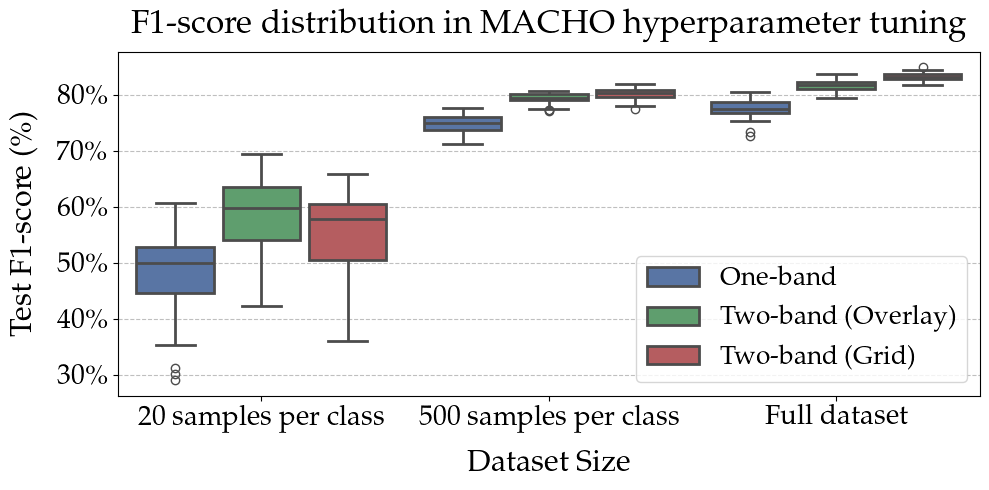

In [7]:
gropued_results_macho["Data Type"] = "One-band"
gropued_results_macho_multiband_overlay = gropued_results_macho_multiband[gropued_results_macho_multiband["params.imgs_params/input_type"] == "overlay"].copy()
gropued_results_macho_multiband_overlay["Data Type"] = "Two-band (Overlay)"
gropued_results_macho_multiband_grid = gropued_results_macho_multiband[gropued_results_macho_multiband["params.imgs_params/input_type"] == "2grid"].copy()
gropued_results_macho_multiband_grid["Data Type"] = "Two-band (Grid)"

df_combined = pd.concat([gropued_results_macho, gropued_results_macho_multiband_overlay, gropued_results_macho_multiband_grid])

# Configurar estilo del gráfico
fs = 18
plt.figure(figsize=(10,5))

# Crear gráfico de cajas
ax = sns.boxplot(
    x=df_combined["params.loader/spc"].astype(str), 
    y=df_combined["metrics.f1/test"]["mean"],  # Usamos los valores de los folds
    hue=df_combined["Data Type"], 
    width=0.9,
    gap=0.1,
    palette=["#4C72B0", "#55A868", "#C44E52"],
    linewidth=2.0
)

# Etiquetas de los ejes y título
ax.set_ylabel("Test F1-score (\%)", fontsize=fs + 4, labelpad=12)
ax.set_xlabel("Dataset Size", fontsize=fs + 4, labelpad=12)
ax.set_title("F1-score distribution in MACHO hyperparameter tuning", fontsize=fs + 6, weight='bold', pad=13) #, weight='bold'

spc_labels = ["20 samples per class", "500 samples per class", "Full dataset"]
ax.set_xticklabels(spc_labels, fontsize=fs + 2)

yticks = np.arange(0.30, 0.85, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f"{int(y*100)}%" for y in yticks], fontsize=fs + 2)

# Formato de los ejes
ax.tick_params(axis='y', labelsize=fs + 2)
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
ax.grid(axis="y", linestyle="--", alpha=0.8)

# Mostrar el gráfico con leyenda
plt.legend(fontsize=fs + 1, loc="lower right")
plt.tight_layout()
os.makedirs('./images', exist_ok=True)
plt.savefig("./images/F1_hp_tuning_MACHO.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [14]:
mlflow.set_tracking_uri("file:./results/elasticc_1/ml-runs")

data_name =  'elasticc_1'
experiment_name = f"ft_classification/{data_name}/testing"

experiment = mlflow.get_experiment_by_name(experiment_name)
if experiment:
    experiment_id = experiment.experiment_id
    print(f"Experiment ID for '{experiment_name}': {experiment_id}")
else:
    print(f"Experiment '{experiment_name}' not found.")

runs = mlflow.search_runs(experiment_ids=[experiment_id])
order_columns = [
    'run_id',
    'status',
    'metrics.epoch',
    'metrics.f1/test',
    'metrics.loss/test',
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    #'params.loader/spc',
    'start_time',
    'end_time',
]

runs = runs[order_columns]
runs_elasticc_1 = runs.dropna()
runs_elasticc_1

Experiment ID for 'ft_classification/elasticc_1/testing': 614122580949636032


,run_id,status,metrics.epoch,metrics.f1/test,metrics.loss/test,params.imgs_params/fig_params/linewidth,params.imgs_params/fig_params/markersize,params.imgs_params/input_type,params.imgs_params/use_err,params.training/lr,start_time,end_time
0,50d3ba42d98c4090918e342ce955b65d,FINISHED,10.0,0.615701,2.506598,2.0,5.0,6grid,False,5e-06,2025-02-09 21:56:25.063000+00:00,2025-02-12 20:09:07.599000+00:00
1,2fe77707183542d68d0598d6cfa548a1,FINISHED,21.0,0.638624,2.292132,1.5,1.0,6grid,True,5e-06,2025-02-09 21:56:22.013000+00:00,2025-02-15 01:43:19.882000+00:00
2,eda9d70827e140a8b370542ad5a347cd,FINISHED,15.0,0.640043,2.206066,1.5,5.0,6grid,True,5e-06,2025-02-09 21:56:19.092000+00:00,2025-02-14 00:22:53.347000+00:00
3,12fa91cf913247679fda96af85894999,FINISHED,20.0,0.643217,2.240767,1.5,4.0,6grid,True,5e-06,2025-02-09 21:56:17.755000+00:00,2025-02-14 22:09:22.275000+00:00
4,83d01101bda44c818a3a445d986f19f5,FINISHED,16.0,0.643945,2.047284,1.0,5.0,6grid,True,5e-06,2025-02-09 21:56:17.755000+00:00,2025-02-14 03:27:31.602000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
370,033aeaeab1aa475d829237e175633950,FINISHED,14.0,0.638051,1.782961,0.5,4.0,overlay,False,5e-05,2024-12-12 10:30:23.921000+00:00,2024-12-14 00:58:20.395000+00:00
371,ebeeee4e22f84ac19056a86706efa29c,FINISHED,22.0,0.618488,2.324481,0.5,5.0,overlay,False,5e-05,2024-12-12 10:30:23.921000+00:00,2024-12-14 17:21:24.128000+00:00
374,7be855abe6ce48efaa64b89c14459de2,FINISHED,31.0,0.620341,2.651128,0.5,3.0,overlay,False,5e-05,2024-12-10 23:50:13.597000+00:00,2024-12-14 02:34:39.951000+00:00
376,584fdd7b0a7542389a62fe0e3776103c,FINISHED,16.0,0.628851,1.976501,0.5,1.0,overlay,False,5e-05,2024-12-10 23:45:56.506000+00:00,2024-12-12 19:02:27.576000+00:00


In [15]:
show_df = runs_elasticc_1.copy()
show_df.loc[:, 'training_time'] = show_df['end_time'] - show_df['start_time']
cols = show_df.columns.tolist()
cols.insert(2, cols.pop(cols.index('training_time')))
show_df = show_df[cols].drop(['end_time', 'start_time'], axis=1)
show_df = show_df.sort_values(by=['metrics.f1/test'], ascending=False)

group_columns = [
    'params.imgs_params/fig_params/linewidth',
    'params.imgs_params/fig_params/markersize',
    'params.imgs_params/input_type',
    'params.imgs_params/use_err',
    'params.training/lr',
    #'params.loader/spc',
]

# Calculating the mean for metrics within each group
grouped_results_elasticc_1 = show_df.groupby(group_columns).agg({
    'metrics.f1/test': ['mean', 'std'],
    'metrics.loss/test': ['mean', 'std'],
    'training_time': ['mean', 'std']
}).reset_index()

grouped_results_elasticc_1

params.imgs_params/fig_params/linewidth  \
                                              
0                                       0.5   
1                                       0.5   
2                                       0.5   
3                                       0.5   
4                                       0.5   
..                                      ...   
155                                     2.0   
156                                     2.0   
157                                     2.0   
158                                     2.0   
159                                     2.0   

    params.imgs_params/fig_params/markersize params.imgs_params/input_type  \
                                                                             
0                                        1.0                         6grid   
1                                        1.0                         6grid   
2                                        1.0                         6grid   
3                                        1.0                         6grid   
4                                        1.0                       overlay   
..                                       ...                           ...   
155                                      5.0                         6grid   
156                                      5.0                       overlay   
157                                      5.0                       overlay   
158                                      5.0                       overlay   
159                                      5.0                       overlay   

    params.imgs_params/use_err params.training/lr metrics.f1/test      \
                                                             mean std   
0                        False              5e-05        0.628507 NaN   
1                        False              5e-06        0.632442 NaN   
2                         True              5e-05        0.653142 NaN   
3                         True              5e-06        0.648666 NaN   
4                        False              5e-05        0.628851 NaN   
..                         ...                ...             ...  ..   
155                       True              5e-06        0.657682 NaN   
156                      False              5e-05        0.623412 NaN   
157                      False              5e-06        0.655182 NaN   
158                       True              5e-05        0.638798 NaN   
159                       True              5e-06        0.649156 NaN   

    metrics.loss/test              training_time      
                 mean std                   mean std  
0            1.680723 NaN 3 days 00:55:51.391000 NaT  
1            1.485640 NaN 4 days 10:32:11.122000 NaT  
2            1.741039 NaN 4 days 06:01:10.045000 NaT  
3            1.815156 NaN 5 days 12:25:19.761000 NaT  
4            1.976501 NaN 1 days 19:16:31.070000 NaT  
..                ...  ..                    ...  ..  
155          1.521649 NaN 4 days 19:32:09.623000 NaT  
156          2.051391 NaN 2 days 00:53:23.872000 NaT  
157          1.118964 NaN 1 days 08:49:36.799000 NaT  
158          2.643703 NaN 4 days 01:01:12.920000 NaT  
159          2.253842 NaN 5 days 06:34:42.245000 NaT  

[160 rows x 11 columns]

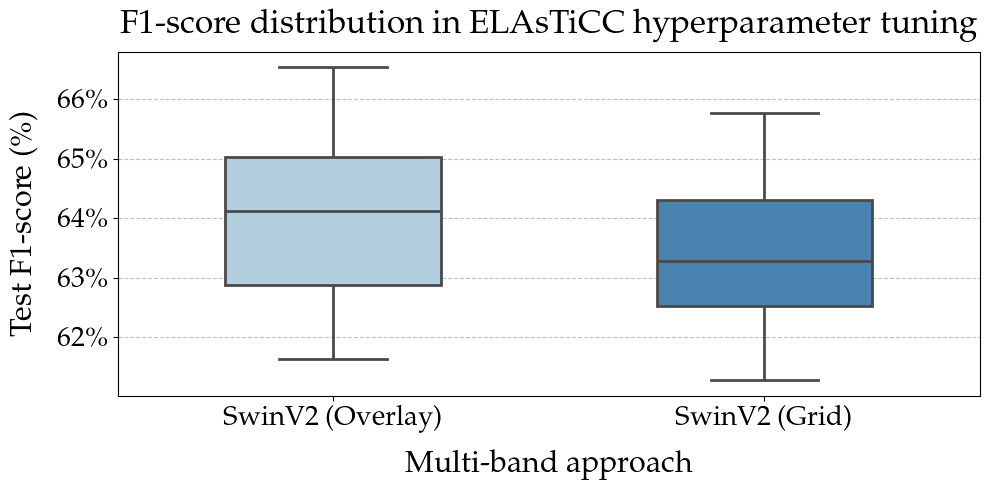

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Etiquetas
input_model_labels = {
    "overlay": "SwinV2 (Overlay)",
    "6grid": "SwinV2 (Grid)",
}

desired_order = ["overlay", "6grid"]

# Filtrar los datos para que estén en el orden correcto
grouped_results_elasticc_1 = grouped_results_elasticc_1.sort_values(
    by="params.imgs_params/input_type", key=lambda x: x.map({k: i for i, k in enumerate(desired_order)})
)

# Configurar estilo del gráfico
fs = 18
plt.figure(figsize=(10, 5))

ax = sns.boxplot(
    x=grouped_results_elasticc_1["params.imgs_params/input_type"].astype(str),
    y=grouped_results_elasticc_1["metrics.f1/test"]["mean"],
    width=0.5,
    palette="Blues",
    linewidth=2.0,
)

# Ajustes de etiquetas y formato
ax.set_xticklabels([input_model_labels[label] for label in grouped_results_elasticc_1["params.imgs_params/input_type"].astype(str).unique()], fontsize=fs + 2)
ax.set_ylabel("Test F1-score (\%)", fontsize=fs + 4, labelpad=12)
ax.set_xlabel("Multi-band approach", fontsize=fs + 4, labelpad=12)
ax.set_title("F1-score distribution in ELAsTiCC hyperparameter tuning", fontsize=fs + 6, pad=13)

#yticks = np.arange(0.60, 0.68, 0.02)
#ax.set_yticks(yticks)
#ax.set_yticklabels([f"{int(y*100)}%" for y in yticks], fontsize=fs + 2)

# Formato de los ejes
ax.tick_params(axis="y", labelsize=fs + 2)
ax.yaxis.set_major_formatter(PercentFormatter(1.0, decimals=0))
ax.grid(axis="y", linestyle="--", alpha=0.8)

# Mostrar el gráfico
plt.tight_layout()
os.makedirs('./images', exist_ok=True)
plt.savefig("./images/F1_hp_tuning_ELAsTiCC.pdf", format='pdf', bbox_inches='tight')
plt.show()
